In [1]:
import h5py

In [3]:
import pydot

In [4]:
print(pydot.__version__)

1.2.4


In [15]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [22]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [42]:
type(X_test)

numpy.ndarray

In [24]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [40]:
np.array(tuple([[4,5]])).shape

(1, 2)

In [44]:
type(np.array(tuple([[4,5]])))

numpy.ndarray

In [47]:
print(Y_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [56]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [50]:
print(Y_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [52]:
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [53]:
model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [54]:
model.fit(X_train, Y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 6s 101us/step - loss: 2.3006 - acc: 0.1154
Epoch 2/5
60000/60000 [==============================] - 5s 90us/step - loss: 2.3000 - acc: 0.1124
Epoch 3/5
60000/60000 [==============================] - 5s 91us/step - loss: 2.2997 - acc: 0.1124
Epoch 4/5
60000/60000 [==============================] - 5s 91us/step - loss: 2.2993 - acc: 0.1124
Epoch 5/5
60000/60000 [==============================] - 5s 91us/step - loss: 2.2989 - acc: 0.1124


In [57]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

10000/10000 [==============================] - 0s 41us/step


In [58]:
print('loss_and_met : ', str(loss_and_metrics))

loss_and_met :  [2.2248213020324705, 0.1711]


In [65]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [66]:
%matplotlib inline

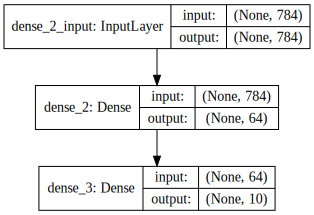

In [67]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [68]:
from keras.models import load_model


In [69]:
model.save('mnist_mlp_model.h5')

In [71]:
model = load_model('mnist_mlp_model.h5')